# Proyek Analisis Data: [Brazilian E Commerce]
- **Nama:** [Siti Riza Fatimah Syafrudin]
- **Email:** [sirizafan12@gmail.com]
- **ID Dicoding:** [sitirizafs]

## Menentukan Pertanyaan Bisnis

Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue dalam 3 bulan terakhir di tahun 2018?
2. Apa produk yang paling laris terjual dan paling rendah penjualannya dalam 3 bulan terakhir?
3. Bagaimana sebaran seller berdasarkan kota dan state?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np ## Numerical Python
import pandas as pd ## Python for Data Analysis
import matplotlib.pyplot as plt ## Ploting Library Available
import seaborn as sns ## Library for Making Statistical Graphs

#Install Kaggle for import dataset
!pip install kaggle

##Import dataset

Mengunggah file kaggle.json

In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"sitirizafatimahs","key":"e6cdc9248981440b167062dbc9504bdd"}'}

Memindahkan file kaggle.json ke direktori

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d olistbr/brazilian-ecommerce

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 77% 33.0M/42.6M [00:00<00:00, 98.7MB/s]
100% 42.6M/42.6M [00:00<00:00, 103MB/s] 


Unduh dataset dari kaggle

In [5]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


Ekstrak dataset

In [6]:
import zipfile
with zipfile.ZipFile('brazilian-ecommerce.zip', 'r') as zip_ref:
    zip_ref.extractall('brazilian_ecommerce')

## Data Wrangling

### Gathering Data

Membaca file dataset customers

In [7]:
import pandas as pd
customers_df = pd.read_csv('brazilian_ecommerce/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membaca file dataset order

In [8]:
import pandas as pd
orders_df = pd.read_csv('brazilian_ecommerce/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membaca file dataset sellers

In [9]:
import pandas as pd
sellers_df = pd.read_csv('brazilian_ecommerce/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Membaca file dataset order_items

In [10]:
import pandas as pd
order_items_df = pd.read_csv('brazilian_ecommerce/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Membaca file dataset products

In [11]:
import pandas as pd
products_dataset_df = pd.read_csv('brazilian_ecommerce/olist_products_dataset.csv')
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

Menilai dataset customers.
Dengan langkah:
1. cek informasi
2. cek missing value
3. cek duplikasi
4. cek parameter statistik

In [12]:
#menilai dataset customers

#cek informasi
customers_df.info()
#cek missing value
print("Jumlah missing value: ", customers_df.isnull().sum().sum())
#cek duplikasi
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
#cek parameter statistik
customers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah missing value:  0
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight pada dataset customers:**
- tipe data sudah sesuai
- tidak ada missing value
- tidak ada duplikasi
- parameter statistik sesuai.

Menilai dataset orders.
Dengan langkah:
1. cek informasi
2. cek missing value
3. cek duplikasi
4. cek parameter statistik

In [13]:
#menilai dataset orders

#cek informasi
orders_df.info()
#cek missing value
print("Jumlah missing value: ", orders_df.isnull().sum().sum())
#cek duplikasi
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
#cek parameter statistik
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah missing value:  4908
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight pada dataset orders:**
- tipe data pada: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date tida sesuai, harusnya memakai tipe data datatime
- ada missing value pada: order_approved_at, order_delivered_carrier_date, dan order_delivered-customer_date dengan total 4908 missing values
- tidak ada duplikasi
- parameter statistik sesuai

Menilai dataset sellers.
Dengan langkah:
1. cek informasi
2. cek missing value
3. cek duplikasi
4. cek parameter statistik

In [14]:
#menilai dataset sellers

#cek informasi
sellers_df.info()
#cek missing value
print("Jumlah missing value: ", sellers_df.isnull().sum().sum())
#cek duplikasi
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
#cek parameter statistik
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah missing value:  0
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight pada dataset sellers:**

- tipe data sesuai
- tidak ada missing value
- tidak ada duplikasi
- parameter sesuai

Menilai dataset order_items.
Dengan langkah:
1. cek informasi
2. cek missing value
3. cek duplikasi
4. cek parameter statistik

In [15]:
#menilai dataset order_items

#cek informasi
order_items_df.info()
#cek missing value
print("Jumlah missing value: ", order_items_df.isnull().sum().sum())
#cek duplikasi
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
#cek parameter statistik
order_items_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah missing value:  0
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight pada dataset order_items:**

- tipe data pada shipping_limit_date harus diubah dari object ke datatime
- tidak ada missing value
- tidak ada duplikasi
- parameter sesuai

Menilai dataset products.
Dengan langkah:
1. cek informasi
2. cek missing value
3. cek duplikasi
4. cek parameter statistik

In [16]:
#menilai dataset products

#cek informasi
products_dataset_df.info()
#cek missing value
print("Jumlah missing value: ", products_dataset_df.isnull().sum().sum())
#cek duplikasi
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum())
#cek parameter statistik
products_dataset_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah missing value:  2448
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight pada dataset products:**

- tipe data sesuai
- ada missing value pada: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
product_weight_g, product_length_cm, product_height_cm, product_width_cm.
Tapi data tersebut tidak dibutuhkan, jadi akan dihapus.
- tidak ada duplikasi
- parameter sesuai

### Cleaning Data

Mengatasi kesalahan tipe data pada dataset orders, pada kolom:
- order_purchase_timestamp
- order_approved_at,
- order_delivered_carrier_date,
- order_delivered_customer_date, dan
- order_estimated_delivery_date

Mengganti kesalahan tipedata pada dataset orders, dari tipe object menjadi datetime.

In [17]:
#mengganti tipedata
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()
#hasil:
#missing value pada kolom-kolom tersebut solved.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengatasi missing value pada dataset orders.
Dengan cek data pada: order_approved_at.

hasil:
column order_approved_at mengalami missing value karena terjadi pembatalan order oleh customer.
Jadi, lakukan imputation pada kolom order_approved_at dengan menggunakan
nilai dari kolom order_purchase_timestamp.
Logikanya, pesanan tidak mungkin disetujui sebelum dibeli


In [18]:
#cek data pada:
#order_approved_at
orders_df[orders_df.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


mengisi missing value pada kolom order_approved_at dengan nilai dari kolom order_purchase_timestamp

hasil:
missing value pada kolom order_approved_at solved.

In [19]:
orders_df.fillna({'order_approved_at': orders_df['order_purchase_timestamp']}, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


cek data pada: order_delivered_carrier_date

hasil:
kolom order_delivered_carrier_date terjadi missing value mungkin karena pesanan belum dikirim atau data tidak tercatat.
Solusinya melakukan imputation pada kolom tersebut dengan value rata-rata antara
waktu persetujuan pesanan dan dikirim ke kurir.

In [20]:
orders_df[orders_df.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


menghitung rata-rata waktu antara persetujuan pesanan dan dikirim ke kurir.

In [21]:
avg_delivery_carrier_time = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).mean()

mengisi missing value pada kolom order_delivered_carrier_date dengan nilai
dari hasil avg_delivery_carrier_time


hasil:
missing value pada kolom order_delivered_carrier-date solved.

In [22]:
orders_df.fillna({'order_delivered_carrier_date': orders_df['order_approved_at'] + avg_delivery_carrier_time}, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


cek data pada: order_delivered_customer_date

hasil: kolom order_delivered_customer_date terjadi missing value mungkin karena pesanan belum terkirim
Solusinya melakukan imputation pada kolom tersebut dengan value rata-rata antara waktu pengiriman ke kurir dan pengiriman ke pelanggan.

In [23]:
orders_df[orders_df.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-16 08:44:56.331800774,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00.000000000,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-10 01:34:53.331800774,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-06 09:49:48.331800774,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23.000000000,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-09-03 11:33:23.331800774,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-12 02:37:44.331800774,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-09-09 14:05:26.331800774,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-31 11:04:26.331800774,NaT,2017-09-15


menghitung rata-rata waktu antara pengirimnan ke kurir dan pengiriman ke pelanggan.

In [24]:
avg_delivery_customer_time = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).mean()

mengisi missing value pada kolom order_delivered_carrier_date dengan nilai dari hasil avg_delivery_carrier_time

hasil:
missing value pada kolom order_delivered_customer_date solved.



In [25]:
orders_df.fillna({'order_delivered_customer_date': orders_df['order_delivered_carrier_date'] + avg_delivery_customer_time}, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengatasi kesalahan tipe data pada dataset order_items

Dengan mengganti tipedata pada column shipping_limit_date.

In [26]:
datetime_columns = ['shipping_limit_date']

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Mengatasi missing value pada dataset products

Missing value terjadi pada kolom:
product_category_name, product_name_lenght, product_description_lenght, product_photos_qty
product_weight_g, product_length_cm, product_height_cm, product_width_cm

Tapi karena dari semua kolom itu hanya diperlukan value dari product_category_name,
maka perbaikan missing value hanya akan dilakukan pada value tersebut.
Lalu kolom lainnya akan dihapus karena tidak diperlukan.

Memperbaiki missing value pada product_category_name, dengan imputation menggunakan value dominan karena jenis datanya kategorik
Menghitung value dominan dari product_category_name

In [27]:
products_dataset_df.product_category_name.value_counts()


,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


value dominan dari product_category_name adalah cama_mesa_banho.
Mengisi missing value pada product_category_name dengan value dominan

In [28]:
products_dataset_df.fillna({'product_category_name': 'cama_mesa_banho'}, inplace=True)
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Menghapus kolom yang tidak diperlukan

In [29]:
products_dataset_df.drop([
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
    ],axis=1, inplace=True)

products_dataset_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


**Insight:**
- kesalahan tipe data pada dataset orders, pada kolom: order_purchase_timestamp, order_approved_at,
order-delivered_carrier_data, dan order_delivered_customer-date sudah diperbaiki
- missing value pada dataset orders, pada kolom: order_approved_at,
order-delivered_carrier_data, dan order_delivered_customer-date sudah diperbaiki
- kesalahan tipe data pada dataset orders, pada kolom: shipping_limit_date sudah diperbaiki
- missing value pada dataset products sudah diperbaiki
- kolom yang tidak diperlukan pada dataset products sudah dihapus

## Exploratory Data Analysis (EDA)

### Explore Data customers_df

Melihat rangkuman parameter statistik dari data customer_df

In [30]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Melihat demografi customer berdasarkan kota

In [31]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


melihat demografi customer berdasarkan state

In [32]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- jumlah customer sebanyak 99441 orang
- hasil demografi sebaran customer terbanyak ada di kota Sao Paulo dan di negara dengan kode SP
- hasil demografi sebaran customer terbanyak ada di negara dengan kode SP

### Explore Data orders_df,  order_items_df dan products_dataset_df

melihat rangkuman parameter statistik dari data orders_df

In [33]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 14:27:00.496521728,2018-01-12 22:23:35.847859456,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:46:19.331800774,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:43:36,2017-09-22 20:25:49,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 14:58:56,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:55:00,2018-05-15 16:52:14,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-20 12:49:57.331800774,2018-10-29 20:46:32.683138600,2018-11-12 00:00:00


Melihat rangkuman parameter statistik dari data order_items_df

In [34]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


melihat rangkuman parameter statistik dari data products_dataset_df

In [35]:
products_dataset_df.describe(include="all")

,product_id,product_category_name
count,32951,32951
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3639


menggabungkan data orders_df dan order_items_df

In [36]:
all_info_product_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)


menggabungkan data all_info_product_df dan products_dataset_df


In [37]:
all_info_product_df = pd.merge(
    left=all_info_product_df,
    right=products_dataset_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

all_info_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria


menambahkan kolom 'quantity' untuk mengetahui jumlah penjualan tiap produk

In [38]:
all_info_product_df['quantity'] = all_info_product_df.groupby('product_id')['product_id'].transform('count')
all_info_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,106.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,3.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,4.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,40.0


mengetahui gambaran produk yang dijual

In [39]:
all_info_product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id  quantity  price         
                             nunique       sum    min      max
product_category_name                                         
agro_industria_e_comercio         74    1926.0  12.99  2990.00
alimentos                         82   22530.0   9.99   274.99
alimentos_bebidas                104    2094.0   6.50   699.90
artes                             55   11795.0   3.50  6499.00
artes_e_artesanato                19      46.0   9.80   289.49
...                              ...       ...    ...      ...
sinalizacao_e_seguranca           93     747.0   4.50   740.00
tablets_impressao_imagem           9    1811.0  14.90   889.99
telefonia                       1134   82335.0   5.00  2428.00
telefonia_fixa                   116    1476.0   6.00  1790.00
utilidades_domesticas           2335  110172.0   3.06  6735.00

[73 rows x 4 columns]

mengetahui produk yang terlaris dan penyumbang revenue terbesar

In [40]:
all_info_product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
}).sort_values(by=("price", "max"), ascending=False)

product_id  quantity   price         
                                 nunique       sum     min      max
product_category_name                                              
utilidades_domesticas               2335  110172.0    3.06  6735.00
pcs                                   30    3357.0   34.50  6729.00
artes                                 55   11795.0    3.50  6499.00
eletroportateis                      231    4901.0    6.50  4799.00
instrumentos_musicais                289    4032.0    4.90  4399.87
...                                  ...       ...     ...      ...
seguros_e_servicos                     2       2.0  100.00   183.29
fraldas_higiene                       12     297.0   25.00   139.89
fashion_roupa_infanto_juvenil          5      16.0   39.99   110.00
flores                                14     157.0   15.60    65.90
cds_dvds_musicais                      1     196.0   45.00    65.00

[73 rows x 4 columns]

**Insight:**
- jenis barang yang laris terjual dan memberikan revenue terbanyak adalah utilidades_domesticas

### Explore Data sellers_df


melihat rangkuman parameter statistik dari data sellers_df

In [41]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


melihat sebaran seller berdasarkan kota

In [42]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


melihat sebaran seller berdasarkan state

In [43]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


**Insight:**
- demografi seller berdasarkan kota, terbanyak di Sao Paulo
- demografi seller berdasarkan state, terbanyak di kode SP

menggabungkan seluruh dataset (all_info_product_df ditambah sellers_df)

In [44]:
all_info_product_df = pd.merge(
    left=all_info_product_df,
    right=sellers_df,
)

all_info_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,quantity,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,106.0,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,3.0,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,4.0,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,40.0,8752,mogi das cruzes,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue dalam 3 bulan terakhir di tahun 2018?

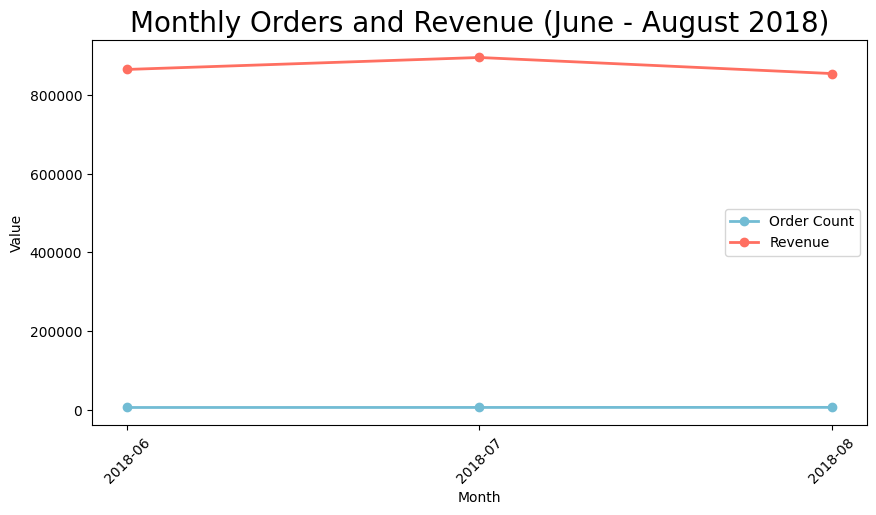

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data untuk 3 bulan terakhir di tahun 2018
filtered_data = all_info_product_df[
    (all_info_product_df['order_purchase_timestamp'] >= '2018-06-01') &
    (all_info_product_df['order_purchase_timestamp'] <= '2018-08-31')
]

# Resample data berdasarkan bulan
monthly_orders_revenue = filtered_data.resample(
    rule='ME',
    on='order_purchase_timestamp'
).agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_revenue.index = monthly_orders_revenue.index.strftime('%Y-%m')
monthly_orders_revenue = monthly_orders_revenue.reset_index()
monthly_orders_revenue.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

# Visualisasi jumlah order per bulan
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_revenue['order_purchase_timestamp'],
    monthly_orders_revenue['order_count'],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label='Order Count'
)
# Visualisasi total revenue per bulan
plt.plot(
    monthly_orders_revenue['order_purchase_timestamp'],
    monthly_orders_revenue['revenue'],
    marker='o',
    linewidth=2,
    color="#FF6F61",
    label='Revenue'
)
plt.title('Monthly Orders and Revenue (June - August 2018)', loc='center', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()
plt.show()


**Insight:**
- Order Count: Jumlah order per bulan relatif rendah dan konsisten. Meskipun terlihat ada fluktuasi yang sedikit, jumlah order tampaknya tidak banyak berubah antara Juni hingga Agustus.

- Revenue: Terlihat bahwa revenue cenderung stabil dan cenderung menurun sedikit pada bulan Agustus, meskipun ini tidak terlihat terlalu signifikan.

### Pertanyaan 2: Apa produk yang paling laris terjual dan paling rendah penjualannya dalam 3 bulan terakhir?

membuat dataframe baru untuk menampung informasi terkait jumlah penjualan tiap produk

In [64]:
# Filter data untuk 3 bulan terakhir di tahun 2018
filtered_data = all_info_product_df[
    (all_info_product_df['order_purchase_timestamp'] >= '2018-06-01') &
    (all_info_product_df['order_purchase_timestamp'] <= '2018-08-31')
]

# Mengambil 5 produk terlaris berdasarkan quantity
top_5_best = filtered_data.groupby('product_category_name')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()

# Mengambil 5 produk dengan penjualan terendah berdasarkan quantity
top_5_worst = filtered_data.groupby('product_category_name')['quantity'].sum().sort_values(ascending=True).head(5).reset_index()

# Menyaring untuk memastikan produk dengan quantity yang sama tetap muncul dalam urutan yang konsisten
top_5_worst_sorted = top_5_worst.sort_values(by=['quantity', 'product_category_name'], ascending=[True, True]).head(5).reset_index(drop=True)


<ipython-input-65-78d232c739cc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-65-78d232c739cc>:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
<ipython-input-65-78d232c739cc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-65-78d232c739cc>:19: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


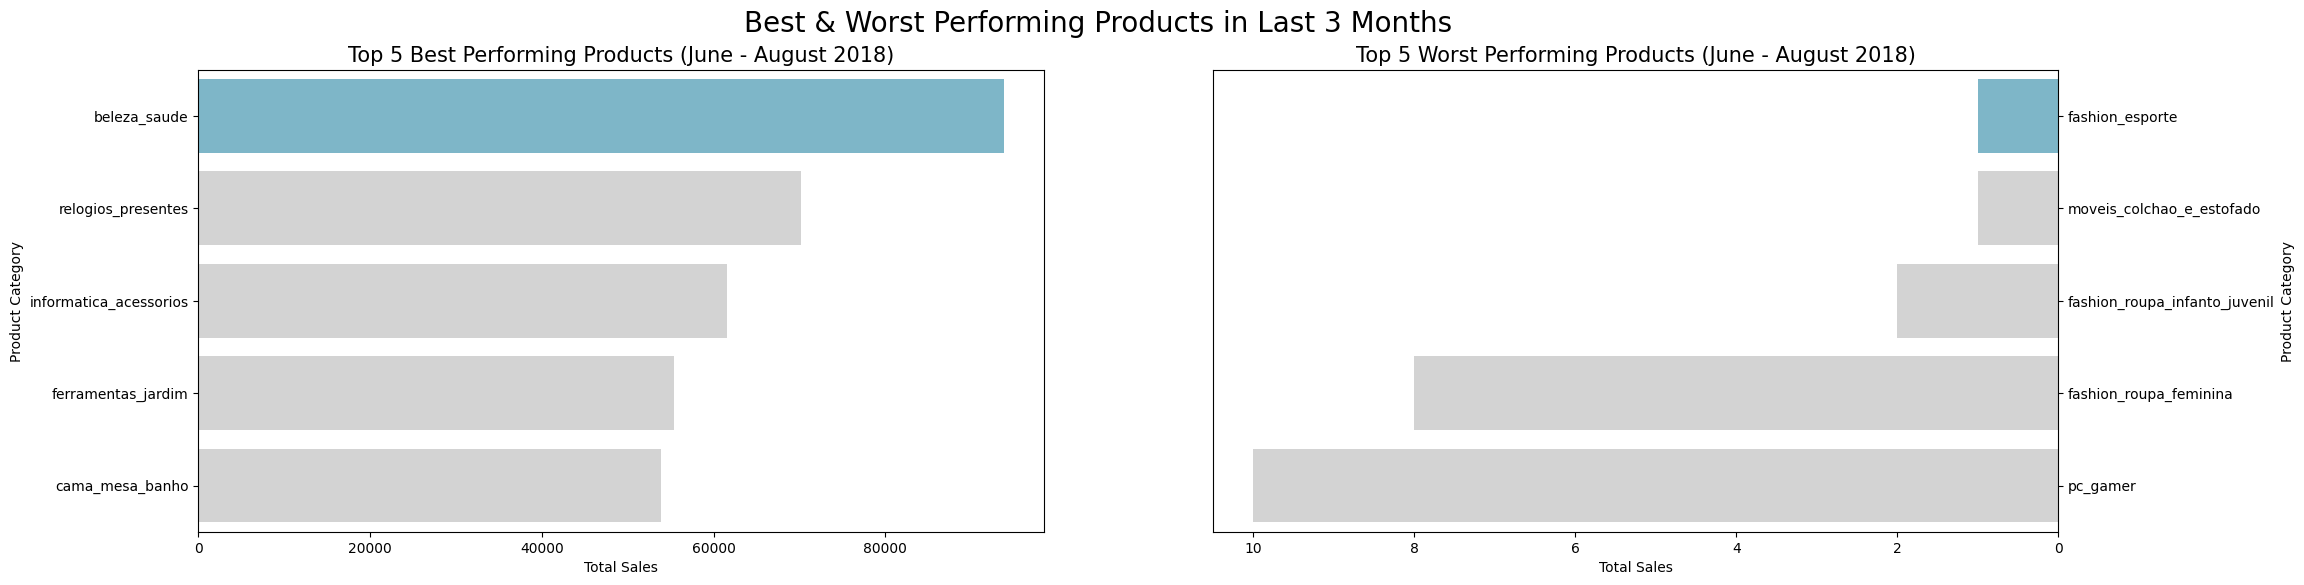

In [65]:
# Membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Best Performing Products
sns.barplot(
    x="quantity",
    y="product_category_name",
    data=top_5_best,
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel('Product Category')
ax[0].set_xlabel('Total Sales')
ax[0].set_title("Top 5 Best Performing Products (June - August 2018)", fontsize=15)

# Worst Performing Products
sns.barplot(
    x="quantity",
    y="product_category_name",
    data=top_5_worst_sorted,
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel('Product Category')
ax[1].set_xlabel('Total Sales')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Worst Performing Products (June - August 2018)", fontsize=15)

plt.suptitle("Best & Worst Performing Products in Last 3 Months", fontsize=20)
plt.show()

**Insight:**
- product dengan penjualan terbaik yaitu beleza_saude
- product dengan penjualan terendah yaitu fashion_esporte

### Pertanyaan 3: Bagaimana sebaran seller berdasarkan kota dan state?

membuat dataframe baru untuk menampung informasi terkait demografi seller berdasarkan kota

<ipython-input-49-bbbe5559e53c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-49-bbbe5559e53c>:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


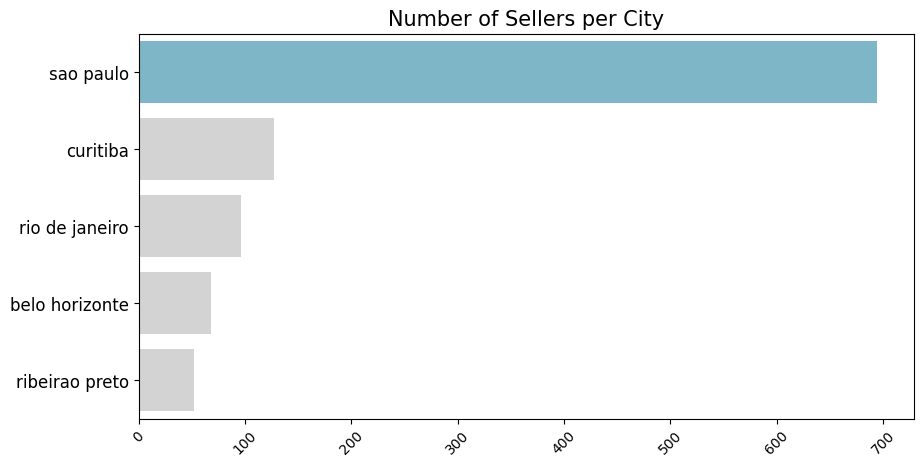

In [49]:
bycity_df = sellers_df.groupby(by="seller_city").seller_id.nunique().reset_index()
bycity_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=bycity_df.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Sellers per City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(fontsize=10, rotation=45)
plt.tick_params(axis='y', labelsize=12)
plt.show()


membuat dataframe baru untuk menampung informasi terkait demografi seller berdasarkan state

<ipython-input-50-ecde05a7d2ba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-50-ecde05a7d2ba>:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


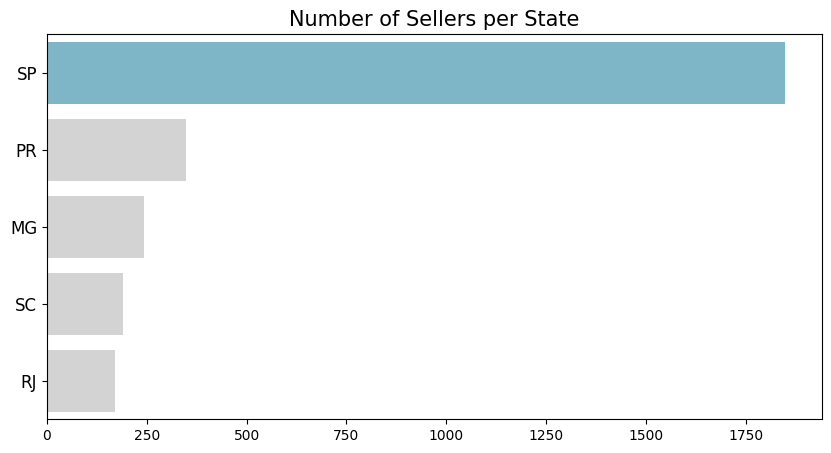

In [50]:
bystate_df = sellers_df.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count",
    y="seller_state",
    data=bystate_df.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Sellers per State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


**Insight:**
- sebaran demografi seller berdasarkan kota terbanyak ada di Sao Paulo, diikuti oleh Curitiba, dan Rio de Janairo
- sebaran demografi seller berdasarkan state terbanyak ada di state dengan kode SP, diikuti oleh state dengan kode PR dan state dengan kode MG

## RFM Analysis (opsional)

Jumlah duplikasi pada customer_id_initial: 0
Top 5 Best Customers based on Recency, Frequency, and Monetary:
                            customer_id  frequency  monetary  recency  \
29063  4b7decb9b58e2569548b8b4c8e20e8d7          1     145.0        0   
88844  e60df9449653a95af4549bbfcb18a6eb          1     209.0        5   
71469  b8c19e70d00f6927388e4f31c923d785          1     169.8        5   
33320  56b1ac2855cc6d7950b4ffa6a9b41b0d          1     109.9        5   
32387  54365416b7ef5599f54a6c7821d5d290          1      99.0        5   

      customer_id_initial  
29063                e8d7  
88844                a6eb  
71469                d785  
33320                1b0d  
32387                d290  


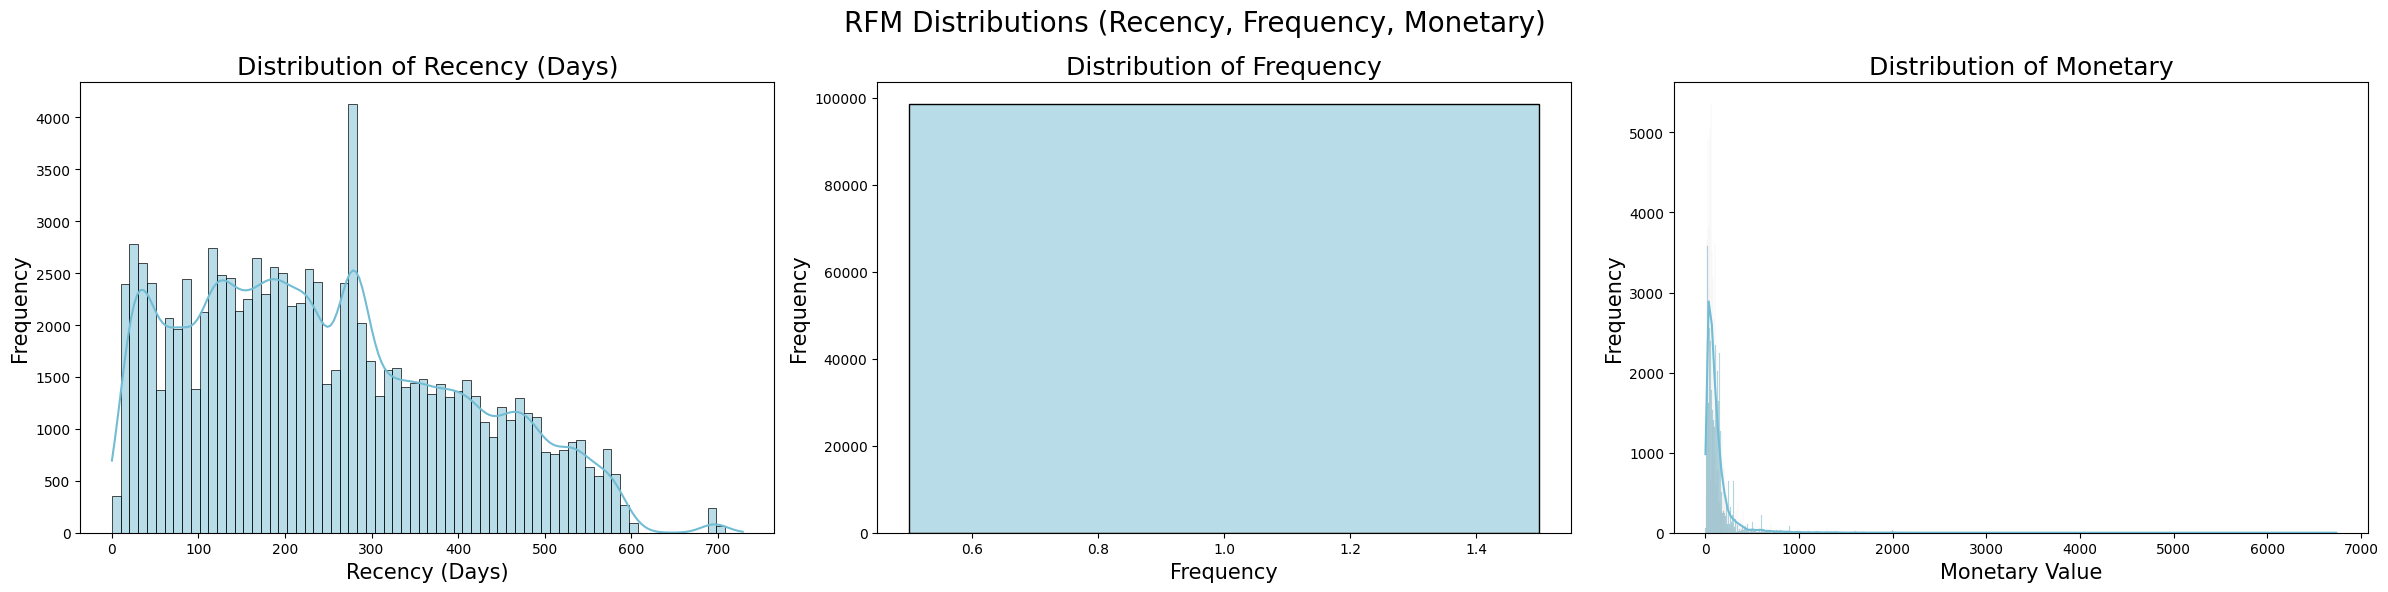

<ipython-input-51-bda6cb453dcc>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[0])
<ipython-input-51-bda6cb453dcc>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[1])
<ipython-input-51-bda6cb453dcc>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[2])


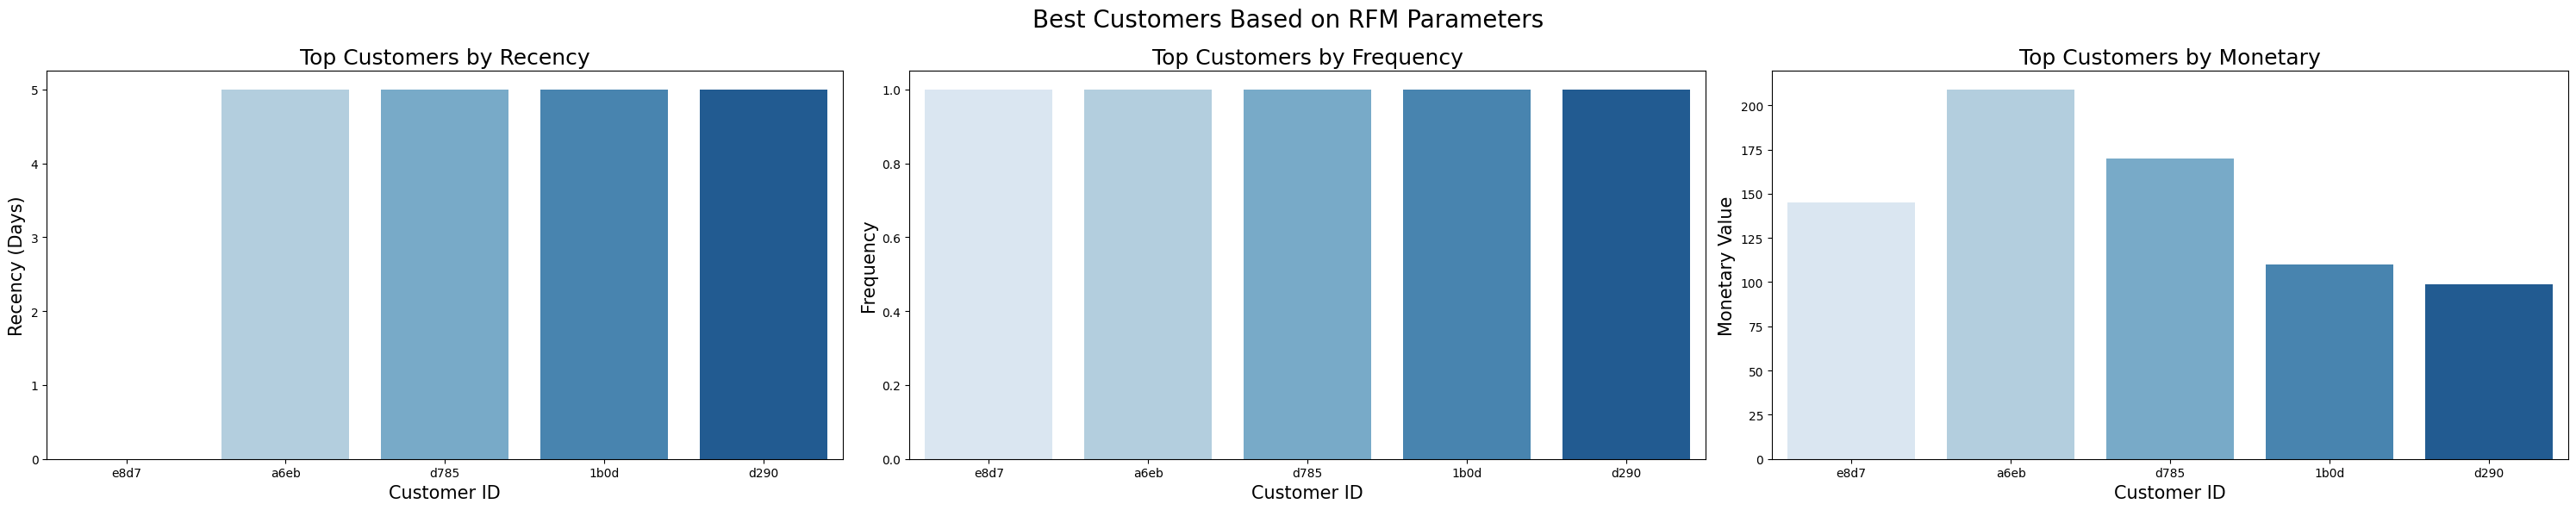

In [51]:
# Melakukan analisis RFM
rfm_df = all_info_product_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # Mengambil tanggal order terakhir
    "order_id": "nunique", # Menghitung jumlah order
    "price": "max" # Menghitung jumlah revenue yang dihasilkan
})

# Mengganti nama kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung recency berdasarkan tanggal order terakhir
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_info_product_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom max_order_timestamp
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Menambahkan kolom 'customer_id_initial' untuk mempersingkat tampilannya
rfm_df['customer_id_initial'] = rfm_df['customer_id'].str[-4:]

# Memeriksa duplikasi pada customer_id_initial
print(f"Jumlah duplikasi pada customer_id_initial: {rfm_df.duplicated().sum()}")

# Menampilkan 5 customer terbaik berdasarkan RFM
top_customers = rfm_df.sort_values(by=["recency", "frequency", "monetary"], ascending=[True, False, False]).head(5)
print("Top 5 Best Customers based on Recency, Frequency, and Monetary:")
print(top_customers)

# Visualisasi distribusi Recency, Frequency, and Monetary
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Plot Recency
sns.histplot(rfm_df['recency'], kde=True, ax=ax[0], color="#72BCD4")
ax[0].set_title("Distribution of Recency (Days)", fontsize=18)
ax[0].set_xlabel("Recency (Days)", fontsize=15)
ax[0].set_ylabel("Frequency", fontsize=15)

# Plot Frequency
sns.histplot(rfm_df['frequency'], kde=True, ax=ax[1], color="#72BCD4")
ax[1].set_title("Distribution of Frequency", fontsize=18)
ax[1].set_xlabel("Frequency", fontsize=15)
ax[1].set_ylabel("Frequency", fontsize=15)

# Plot Monetary
sns.histplot(rfm_df['monetary'], kde=True, ax=ax[2], color="#72BCD4")
ax[2].set_title("Distribution of Monetary", fontsize=18)
ax[2].set_xlabel("Monetary Value", fontsize=15)
ax[2].set_ylabel("Frequency", fontsize=15)

plt.suptitle("RFM Distributions (Recency, Frequency, Monetary)", fontsize=20)
plt.tight_layout()
plt.show()

# Visualisasi Top 5 Best Customers Based on RFM Parameters
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

# Plot Recency
sns.barplot(y="recency", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[0])
ax[0].set_ylabel("Recency (Days)", fontsize=15)
ax[0].set_xlabel("Customer ID", fontsize=15)
ax[0].set_title("Top Customers by Recency", fontsize=18)

# Plot Frequency
sns.barplot(y="frequency", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[1])
ax[1].set_ylabel("Frequency", fontsize=15)
ax[1].set_xlabel("Customer ID", fontsize=15)
ax[1].set_title("Top Customers by Frequency", fontsize=18)

# Plot Monetary
sns.barplot(y="monetary", x="customer_id_initial", data=top_customers, palette="Blues", ax=ax[2])
ax[2].set_ylabel("Monetary Value", fontsize=15)
ax[2].set_xlabel("Customer ID", fontsize=15)
ax[2].set_title("Top Customers by Monetary", fontsize=18)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=20)
plt.tight_layout()
plt.show()


## Conclusion

**Conclution pertanyaan 1:**
Jumlah order per bulan relatif rendah dan konsisten. Meskipun terlihat ada fluktuasi yang sedikit, jumlah order tampaknya tidak banyak berubah antara Juni hingga Agustus. Terlihat bahwa revenue cenderung stabil dan cenderung menurun sedikit pada bulan Agustus, meskipun ini tidak terlihat terlalu signifikan. Konsistensi jumlah order ini bisa menunjukkan bahwa pasar tetap stabil meskipun ada perubahan musiman atau tren. Penurunan revenue di Agustus mungkin disebabkan oleh beberapa faktor eksternal. Untuk pengawasan tren musiman: Perusahaan dapat menggunakan data ini untuk merencanakan strategi penjualan di bulan-bulan mendatang, termasuk penyesuaian stok atau promosi selama periode fluktuasi rendah. Dan mempertimbangkan untuk menawarkan diskon atau promosi khusus agar mendorong lebih banyak transaksi saay terjadi penurunan revenue

**Conclution pertanyaan 2:**
product dengan penjualan terbaik yaitu beleza_saude yang menyentuh angka 800000 penjualan  dalam 3 bulan terakhir dan product dengan penjualan terendah yaitu fashion_esporte yang hanya terjual 2 product selama 3 bulan terakhir. Sebuah rekomendasi untuk produk dengan penjualan rendah bisa dengan meningkatkan visibilitas produk misalnya dengan meningkatkan penawaran produk melalui iklan, diskon, atau kolaborasi dengan influencer atau mitra yang tepat.


**Conclution pertanyaan 3:**
sebaran demografi seller berdasarkan kota terbanyak ada di Sao Paulo dengan jumlah seller 700 orang diikuti oleh Curitiba sekitar 110 orang dan Rio De Janairo sebanyak 100 orang. Dari sisi state (wilayah), SP (Sao Paulo) menjadi lokasi dengan jumlah seller tertinggi (1.800 orang), diikuti oleh PR (Parana) dengan 300 seller, dan MG (Minas Gerais) dengan 250 seller. Konsentrasi seller terbesar di Sao Paulo dan SP menunjukkan bahwa wilayah ini merupakan pusat aktivitas ekonomi dan perdagangan di Brasil. Ini mungkin mencerminkan infrastruktur yang lebih berkembang dan peluang pasar yang lebih besar di wilayah tersebut.
Sedangkan Curitiba dan Rio De Janeiro, meskipun lebih kecil, menunjukkan adanya potensi pasar yang bisa dikembangkan dengan strategi pemasaran yang tepat, terutama untuk meningkatkan jumlah seller, bisa dengan cara menawarkan insentif atau kemudahan bagi seller yang berlokasi di wilayah tersebut

## Menyimpan seluruh data

In [53]:
#menyimpan seluruh data dalam 'all_data.csv'
all_info_product_df.to_csv("all_data.csv", index=False)